# Experiment Result Analysis


In [28]:
import json
from defines import EVAL_PATH, IMAGE_PATH, DATASET_PATH

from PIL import Image

import random

In [29]:
def eval_result(eval_dir, method_name, t = 5, grid_size = 5, top = None):
    print("{}: ".format(method_name))
    success = []
    failed = []
    total_exp = 0
    with open(f'{eval_dir}/{method_name}_exp.json') as f:
        results = json.load(f)
        results = results[:top] if top != None else results
        total_exp = len(results)
        for res in results:
            true_label = res["true_label_idx"]
            perturbed_label = res["topk_indices"][0]
            if true_label == perturbed_label:
                failed.append(res)
            else:
                success.append(res)

    num_success = len(success)
    success_rate = num_success / total_exp
    print("Success: {}, Failed: {}, Total: {}".format(num_success, len(failed), num_success+len(failed)))

    total_conf = 0.0
    total_pixels = 0
    for exp in success:
        num_pixel = (exp["num_iteration"]+1) * t * (grid_size ** 2)
        perturbed_prob = exp["topk_probabilities"][0]
        total_conf += perturbed_prob
        total_pixels += num_pixel

    avg_pixels = total_pixels/num_success
    
    print("Success Rate: {:.5f}\nConf: {:.5f}\nAvg Percentage Pixels Perturbed: {:.5f}\n".format(success_rate, total_conf/num_success, avg_pixels/(256*256)))
    
    return success, failed

def get_example(method_name, success,  image_folder = f"/home/comps-shared/datasets/benchmark/images"):
    item = random.choice(success)

    org_name = item["input_name"]
    perturbed_name = "perturbed_" + item["input_name"]+".png"
    img_dir = f"{IMAGE_PATH}/{method_name}"

    perturbed_image = Image.open(f"{img_dir}/{perturbed_name}")
    org_img = Image.open(f"{image_folder}/{org_name}")

    display(perturbed_image)
    display(org_img)

    return item

Modified_LocSearchAdv: 
Success: 88, Failed: 12, Total: 100
Success Rate: 0.88000
Conf: 0.30377
Avg Percentage Pixels Perturbed: 0.07532



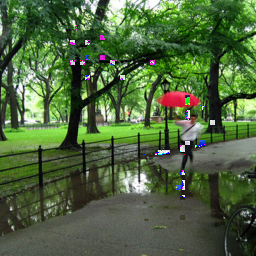

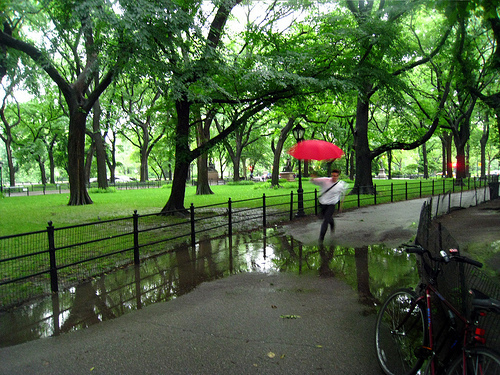

{'input_name': 'ILSVRC2012_val_00017824_n04507155.JPEG',
 'true_label_idx': 879,
 'original_true_class_probability': 0.9464591145515442,
 'true_class_probability': 0.25262802839279175,
 'topk_indices': [880, 879, 671],
 'topk_labels': ['unicycle, monocycle',
  'umbrella',
  'mountain bike, all-terrain bike, off-roader'],
 'topk_probabilities': [0.3077450096607208,
  0.25262802839279175,
  0.06074731796979904],
 'num_iteration': 6}

In [30]:
name = "Modified_LocSearchAdv"
success, failed = eval_result(method_name = name, eval_dir = f"{EVAL_PATH}/{name}")
get_example(name, success)

Org_LocSearchAdv: 
Success: 33, Failed: 67, Total: 100
Success Rate: 0.33000
Conf: 0.31115
Avg Percentage Pixels Perturbed: 0.00353



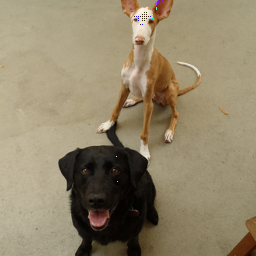

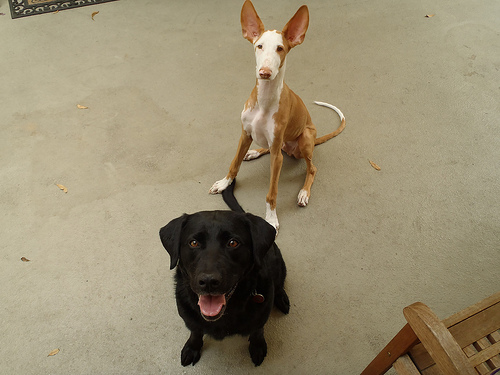

{'input_name': 'ILSVRC2012_val_00012608_n02091244.JPEG',
 'true_label_idx': 173,
 'original_true_class_probability': 0.889543354511261,
 'true_class_probability': 0.154902845621109,
 'topk_indices': [208, 173, 159],
 'topk_labels': ['Labrador retriever',
  'Ibizan hound, Ibizan Podenco',
  'Rhodesian ridgeback'],
 'topk_probabilities': [0.28014206886291504,
  0.154902845621109,
  0.05353599786758423],
 'num_iteration': 8}

In [31]:
name = "Org_LocSearchAdv"
success, failed = eval_result(method_name = name, eval_dir = f"{EVAL_PATH}/{name}", grid_size=1)
get_example(name, success)

In [ ]:
name = "Grid_LocSearchAdv"
success, failed = eval_result(method_name = name, eval_dir = f"{EVAL_PATH}/{name}", grid_size=3)
get_example(name, success)